# Data Exploration

## Dataset Overview

### Structure of Dataset and preview of data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sns
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sb

# Summary Statistics

In [20]:
df = pd.read_csv('../data/cleaned_data/cleaned_datasetIMPORTED.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 63 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Hospital Code                                                               142 non-null    object 
 1   Hospital Name                                                               142 non-null    object 
 2   Trust Name                                                                  142 non-null    object 
 3   Country                                                                     142 non-null    object 
 4   Emergency Medical Admissions                                                142 non-null    int64  
 5   Emergency Repository Admissions                                             142 non-null    int64  
 6   Emergency Asthma Admissions                       

In [21]:
print(df.describe())

       Emergency Medical Admissions  Emergency Repository Admissions  \
count                    142.000000                       142.000000   
mean                     341.633803                        53.901408   
std                      478.454730                       138.535312   
min                       10.000000                         2.000000   
25%                      196.250000                        20.000000   
50%                      220.000000                        20.000000   
75%                      333.750000                        40.000000   
max                     3820.000000                      1160.000000   

       Emergency Asthma Admissions  Paediatric Admissions  \
count                   142.000000             142.000000   
mean                     13.436620              13.338028   
std                      18.704672              11.176779   
min                       0.000000               1.000000   
25%                      10.000000            

### Missing Values

In [22]:
print(df.isnull().sum())
print("\nTotal number of missing values in the Paediatric Admissions Dataset",df.isnull().sum().sum())
# Missing value analysis - EDA 
figure = px.imshow(df.isna(), color_continuous_scale="pinkyl",width=1000,height=600)
figure.update_layout(title="Missing Value Analysis on Dataset",margin=dict(t=50, b=50, l=50, r=50),)
figure.show()

Hospital Code                                       0
Hospital Name                                       0
Trust Name                                          0
Country                                             0
Emergency Medical Admissions                        0
                                                   ..
Unfilled Asthma Nurse Consultant Staff Posts        0
Unfilled  Nurse Consultant Staff Posts              0
Unfilled Nurse Specialist Repository Staff Posts    0
Unfilled Paediatric Psychologist Staff Posts        0
Unfilled Paediatric Pharmacist Staff Posts          0
Length: 63, dtype: int64

Total number of missing values in the Paediatric Admissions Dataset 0


# Unique values

In [23]:
print(df.nunique())
figure = px.histogram(df.nunique())
figure.update_layout(title="Histograms to show the spread of unique data in the dataset")
figure.show()

Hospital Code                                       142
Hospital Name                                       142
Trust Name                                          117
Country                                               3
Emergency Medical Admissions                         85
                                                   ... 
Unfilled Asthma Nurse Consultant Staff Posts          4
Unfilled  Nurse Consultant Staff Posts                3
Unfilled Nurse Specialist Repository Staff Posts      4
Unfilled Paediatric Psychologist Staff Posts          4
Unfilled Paediatric Pharmacist Staff Posts            3
Length: 63, dtype: int64


 # Distributions

In [24]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
for total in numerical_cols :
    figure = px.histogram(df, x=[total], nbins=20)
    figure.update_layout(title="Histograms to show the spread of numerical data in the dataset")
    figure.show()

# Categorical Disrtibution


In [25]:
string_cols = df.select_dtypes(include=['object']).columns.tolist()
for total in string_cols :
    figure = px.histogram(df, x=[total], nbins=20)
    figure.update_layout(title="Histograms to show the spread of categorical data in the dataset")
    figure.show()

# Skew

In [26]:
print(df[numerical_cols].skew(axis=0,skipna=True,numeric_only=True))

Emergency Medical Admissions                                                   5.564088
Emergency Repository Admissions                                                6.349785
Emergency Asthma Admissions                                                    6.456687
Paediatric Admissions                                                          3.174253
Repository Admissions                                                          9.192701
Paediatric Asthma Admissions Per 1000 Admissions                               6.756541
Total Paediatric Beds For Asthma Patients                                      3.712699
Total Paediatric HDU Beds                                                      2.041214
Total Paediatric ICU Beds                                                      6.233451
FY1/2 - Total Repository Staff Posts                                           8.165864
FY1/2 - Staff Posts Per 100 Repository Paediatric Admissions                   5.713348
FY1/2 - Staff Posts Per 100 Asth

# Kurtosis


· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

Emergency Medical Admissions                                                   35.126674
Emergency Repository Admissions                                                42.939446
Emergency Asthma Admissions                                                    47.544783
Paediatric Admissions                                                          12.351539
Repository Admissions                                                          95.910700
Paediatric Asthma Admissions Per 1000 Admissions                               63.438071
Total Paediatric Beds For Asthma Patients                                      17.168988
Total Paediatric HDU Beds                                                       4.295277
Total Paediatric ICU Beds                                                      43.766832
FY1/2 - Total Repository Staff Posts                                           77.604321
FY1/2 - Staff Posts Per 100 Repository Paediatric Admissions                   39.005078
FY1/2 - Staff Posts P

Text(0.5, 0, 'Price ($)')

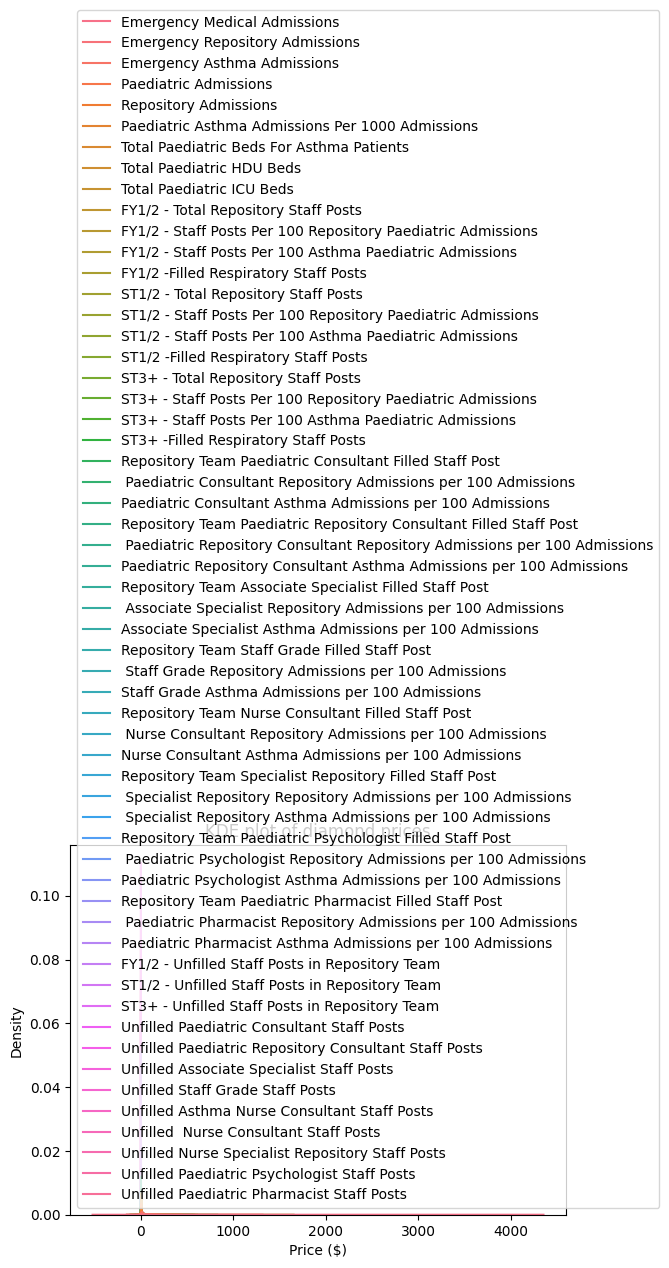

In [32]:
numerical_df = df[numerical_cols]
print(numerical_df.kurtosis(axis=0,skipna=True,numeric_only=True))

sb.kdeplot(numerical_df)
plt.title("KDE plot of diamond prices")
plt.xlabel("Price ($)")

## Categorical Variables Distributions

In [28]:
string_cols = df.select_dtypes(include=['object']).columns.tolist()
for value in string_cols:
    figure = px.histogram(df, x=[value])
    figure.update_layout(title="Histograms to show the spread of numerical data in the dataset")
    figure.show()
df.drop("Hospital Code", axis=1, inplace=True)

# Correlation Analysis

In [29]:
df[numerical_cols].corr()

,Emergency Medical Admissions,Emergency Repository Admissions,Emergency Asthma Admissions,Paediatric Admissions,Repository Admissions,Paediatric Asthma Admissions Per 1000 Admissions,Total Paediatric Beds For Asthma Patients,Total Paediatric HDU Beds,Total Paediatric ICU Beds,FY1/2 - Total Repository Staff Posts,...,ST3+ - Unfilled Staff Posts in Repository Team,Unfilled Paediatric Consultant Staff Posts,Unfilled Paediatric Repository Consultant Staff Posts,Unfilled Associate Specialist Staff Posts,Unfilled Staff Grade Staff Posts,Unfilled Asthma Nurse Consultant Staff Posts,Unfilled Nurse Consultant Staff Posts,Unfilled Nurse Specialist Repository Staff Posts,Unfilled Paediatric Psychologist Staff Posts,Unfilled Paediatric Pharmacist Staff Posts
Emergency Medical Admissions,1.000000,0.839118,0.931382,0.660759,0.489806,-0.007079,0.452586,0.367012,0.540442,-0.002701,...,-0.022883,0.016307,-0.045220,-0.058736,-0.083518,-0.039357,-0.022330,0.120891,0.002298,0.190809
Emergency Repository Admissions,0.839118,1.000000,0.836277,0.689240,0.854647,0.071503,0.293000,0.275239,0.377948,-0.000435,...,-0.031261,0.018831,-0.037185,-0.040379,-0.063123,-0.056625,-0.013907,0.073021,-0.044347,0.129268
Emergency Asthma Admissions,0.931382,0.836277,1.000000,0.544830,0.507390,0.107145,0.468324,0.307321,0.633497,-0.007242,...,-0.047413,0.046218,-0.019973,-0.048662,-0.081486,-0.056055,-0.020519,0.203934,-0.036646,0.272005
Paediatric Admissions,0.660759,0.689240,0.544830,1.000000,0.721477,-0.044289,0.007347,0.096908,0.110695,-0.021230,...,-0.025636,-0.054226,-0.062492,-0.054225,-0.057679,-0.012522,-0.035237,-0.024095,0.032342,-0.027950
Repository Admissions,0.489806,0.854647,0.507390,0.721477,1.000000,0.056783,0.025133,0.066158,0.073965,0.001816,...,-0.053828,-0.032895,-0.028246,-0.030138,-0.044955,-0.038810,-0.006266,-0.014876,-0.037452,-0.007983
Paediatric Asthma Admissions Per 1000 Admissions,-0.007079,0.071503,0.107145,-0.044289,0.056783,1.000000,-0.064634,0.179452,0.023345,0.023592,...,0.010071,-0.032482,0.066059,-0.062547,-0.017128,0.011561,0.042290,0.057988,-0.059645,0.040922
Total Paediatric Beds For Asthma Patients,0.452586,0.293000,0.468324,0.007347,0.025133,-0.064634,1.000000,0.409407,0.715342,0.235593,...,-0.020723,-0.086460,-0.003902,-0.099443,-0.143944,-0.041738,-0.007625,0.103044,0.005345,0.231360
Total Paediatric HDU Beds,0.367012,0.275239,0.307321,0.096908,0.066158,0.179452,0.409407,1.000000,0.232602,-0.025418,...,-0.074354,-0.038748,0.097357,-0.092450,-0.063053,-0.052104,-0.038721,-0.024816,0.022849,0.027442
Total Paediatric ICU Beds,0.540442,0.377948,0.633497,0.110695,0.073965,0.023345,0.715342,0.232602,1.000000,0.194251,...,0.001452,0.042570,0.019985,-0.029913,-0.056188,-0.053740,-0.025969,0.186013,-0.049969,0.248791
FY1/2 - Total Repository Staff Posts,-0.002701,-0.000435,-0.007242,-0.021230,0.001816,0.023592,0.235593,-0.025418,0.194251,1.000000,...,-0.086187,-0.075864,-0.029846,-0.049991,-0.065754,-0.009802,-0.010462,-0.055649,-0.051873,-0.000929


In [30]:
figure = px.imshow(df[numerical_cols].corr(), color_continuous_scale="pinkyl",width=1500,height=800)
figure.update_layout(title="Correlation Analysis on Dataset",margin=dict(t=50, b=50, l=50, r=50),)
figure.show()